# Preprocessing the datasets
## First we will load the necessary libraries and the csv's

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

In [74]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [75]:
!ls


adrian_nutrients.ipynb


In [76]:
nutrients_df = pd.read_csv('../raw_data/nutrients_csvfile.csv')

nutrients_df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [77]:
nutrients_df.shape

(335, 10)

In [78]:
nutrients_df['Category'].nunique()

16

In [79]:
nutrients_df.columns

Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat',
       'Fiber', 'Carbs', 'Category'],
      dtype='object')

In [80]:
nutrients_df.dtypes

Food        object
Measure     object
Grams       object
Calories    object
Protein     object
Fat         object
Sat.Fat     object
Fiber       object
Carbs       object
Category    object
dtype: object

In [81]:
nutrients_df

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
5,Powdered milk,1 cup,103,515,27,28,24,0,39,Dairy products
6,"skim, instant",1 1/3 cups,85,290,30,t,t,0,42,Dairy products
7,"skim, non-instant",2/3 cup,85,290,30,t,t,1,42,Dairy products
8,Goats' milk,1 cup,244,165,8,10,8,0,11,Dairy products
9,(1/2 cup ice cream),2 cups,540,690,24,24,22,0,70,Dairy products


In [82]:
# nutrients_df['Grams'] = nutrients_df['Grams'].str.replace(',', '')

## Converting the string numerical columns into float numbers and filling the missing values

In [83]:

nutrients_df.loc[:,'Grams':'Carbs'] = nutrients_df.loc[:,'Grams':'Carbs'].apply(lambda x: x.str.replace(',', ''))
nutrients_df.loc[:,'Grams':'Carbs'] = nutrients_df.loc[:,'Grams':'Carbs'].apply(lambda x: pd.to_numeric(x, downcast='float', errors='coerce'))
nutrients_df.loc[:,'Grams':'Carbs'] = nutrients_df.loc[:,'Grams':'Carbs'].apply(lambda x: x.astype(float))


In [84]:
nutrients_df.isnull().sum()/len(nutrients_df)

Food        0.000000
Measure     0.000000
Grams       0.000000
Calories    0.005970
Protein     0.116418
Fat         0.346269
Sat.Fat     0.050746
Fiber       0.080597
Carbs       0.038806
Category    0.000000
dtype: float64

In [87]:
nutrients_df.dtypes

Food        object
Measure     object
Grams       object
Calories    object
Protein     object
Fat         object
Sat.Fat     object
Fiber       object
Carbs       object
Category    object
dtype: object

In [86]:
nutrients_df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976.0,660.0,32.0,40.0,36.0,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984.0,360.0,36.0,NaN,NaN,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246.0,127.0,9.0,5.0,4.0,0.0,13.0,Dairy products
3,"Evaporated, undiluted",1 cup,252.0,345.0,16.0,20.0,18.0,0.0,24.0,Dairy products
4,Fortified milk,6 cups,1419.0,1373.0,89.0,42.0,23.0,1.4,119.0,Dairy products


In [69]:
nutrients_df.isnull().sum()

Food          0
Measure       0
Grams         0
Calories      2
Protein      39
Fat         116
Sat.Fat      17
Fiber        27
Carbs        13
Category      0
dtype: int64

In [144]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

#imp.fit(nutrients_df[['Fat']])
nutrients_df['Calories'] = imp.fit_transform(nutrients_df[['Calories']])
nutrients_df['Protein'] = imp.fit_transform(nutrients_df[['Protein']])
nutrients_df['Fat'] = imp.fit_transform(nutrients_df[['Fat']])
nutrients_df['Sat.Fat'] = imp.fit_transform(nutrients_df[['Sat.Fat']])
nutrients_df['Fiber'] = imp.fit_transform(nutrients_df[['Fiber']])
nutrients_df['Carbs'] = imp.fit_transform(nutrients_df[['Carbs']])


nutrients_df.isnull().sum()/len(nutrients_df)


Food        0.0
Measure     0.0
Grams       0.0
Calories    0.0
Protein     0.0
Fat         0.0
Sat.Fat     0.0
Fiber       0.0
Carbs       0.0
Category    0.0
dtype: float64

## Plotting the histograms and boxplots of the variables

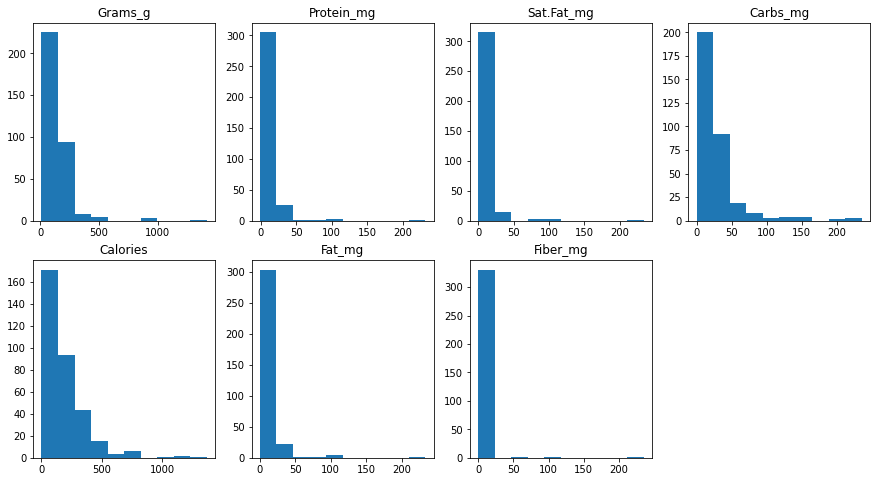

In [146]:
fig, axs = plt.subplots(2,4,sharex=False,figsize=(15,8))


axs[0,0].hist(nutrients_df['Grams'])
axs[0,0].set_title('Grams_g')

axs[1,0].hist(nutrients_df['Calories'])
axs[1,0].set_title('Calories')

axs[0,1].hist(nutrients_df['Protein'])
axs[0,1].set_title('Protein_mg')

axs[1,1].hist(nutrients_df['Fat'])
axs[1,1].set_title('Fat_mg')

axs[0,2].hist(nutrients_df['Sat.Fat'])
axs[0,2].set_title('Sat.Fat_mg')

axs[1,2].hist(nutrients_df['Fiber'])
axs[1,2].set_title('Fiber_mg')

axs[0,3].hist(nutrients_df['Carbs'])
axs[0,3].set_title('Carbs_mg')

axs[1,3].remove()

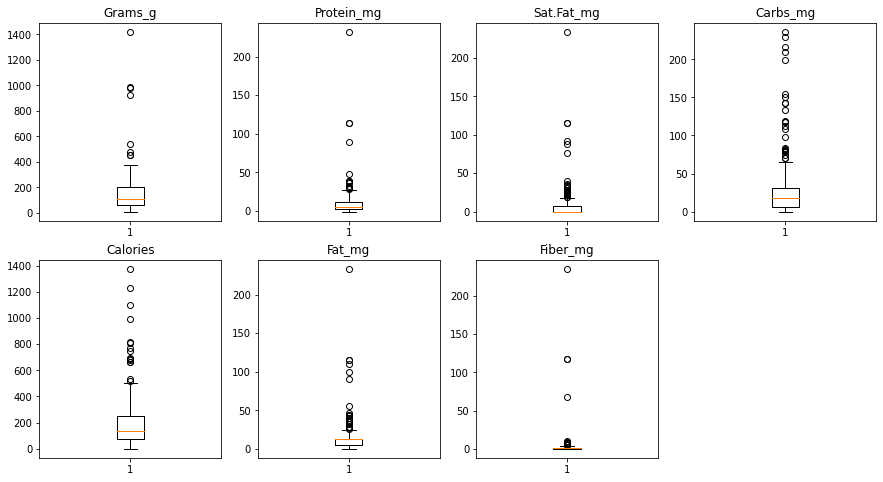

In [147]:
fig, axs = plt.subplots(2,4,sharex=False,figsize=(15,8))


axs[0,0].boxplot(nutrients_df['Grams'])
axs[0,0].set_title('Grams_g')

axs[1,0].boxplot(nutrients_df['Calories'])
axs[1,0].set_title('Calories')

axs[0,1].boxplot(nutrients_df['Protein'])
axs[0,1].set_title('Protein_mg')

axs[1,1].boxplot(nutrients_df['Fat'])
axs[1,1].set_title('Fat_mg')

axs[0,2].boxplot(nutrients_df['Sat.Fat'])
axs[0,2].set_title('Sat.Fat_mg')

axs[1,2].boxplot(nutrients_df['Fiber'])
axs[1,2].set_title('Fiber_mg')

axs[0,3].boxplot(nutrients_df['Carbs'])
axs[0,3].set_title('Carbs_mg')

axs[1,3].remove()

In [148]:
# import pandas_profiling

# nutrients_df.profile_report()

In [156]:
nutrients_df.groupby(['Category']).mean()


,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,
"Breads, cereals, fastfood,grains",264.911111,9.171171,7.212785,2.200000,3.033850,45.755556
Dairy products,301.214286,17.964286,16.009132,12.463163,0.157143,27.891249
"Desserts, sweets",227.862069,4.362535,6.972130,5.637389,1.062297,40.827586
"Drinks,Alcohol, Beverages",92.666667,3.234234,1.088661,0.000000,0.000000,16.082583
"Fats, Oils, Shortenings",259.214286,20.872587,45.071429,38.285714,16.714286,26.353926
"Fish, Seafood",153.263158,31.894737,18.263158,13.263158,12.504035,15.210052
Fruits A-F,151.272727,3.523342,11.003944,0.545455,1.522727,36.909091
Fruits G-P,144.785714,2.732625,12.090509,1.472372,1.121665,36.035714
Fruits R-Z,153.500000,4.513514,11.555936,0.000000,2.175000,41.250000
